Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


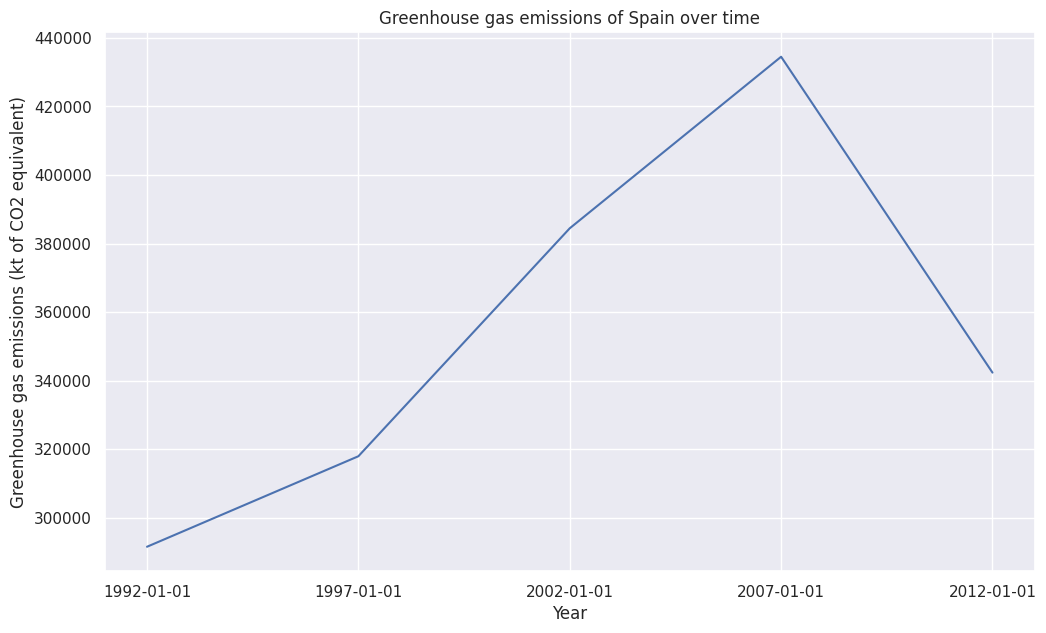

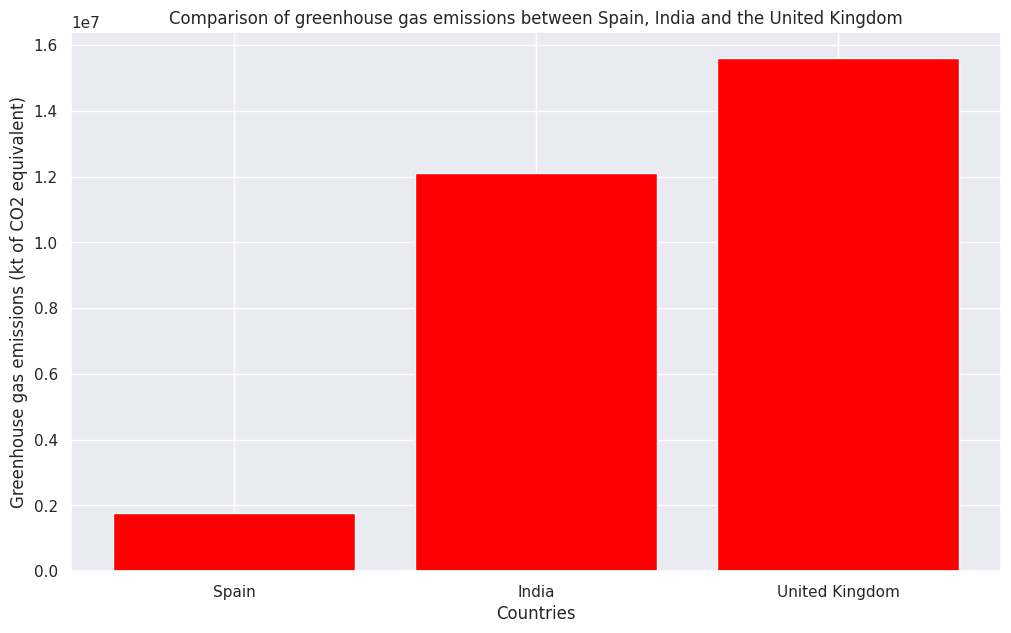

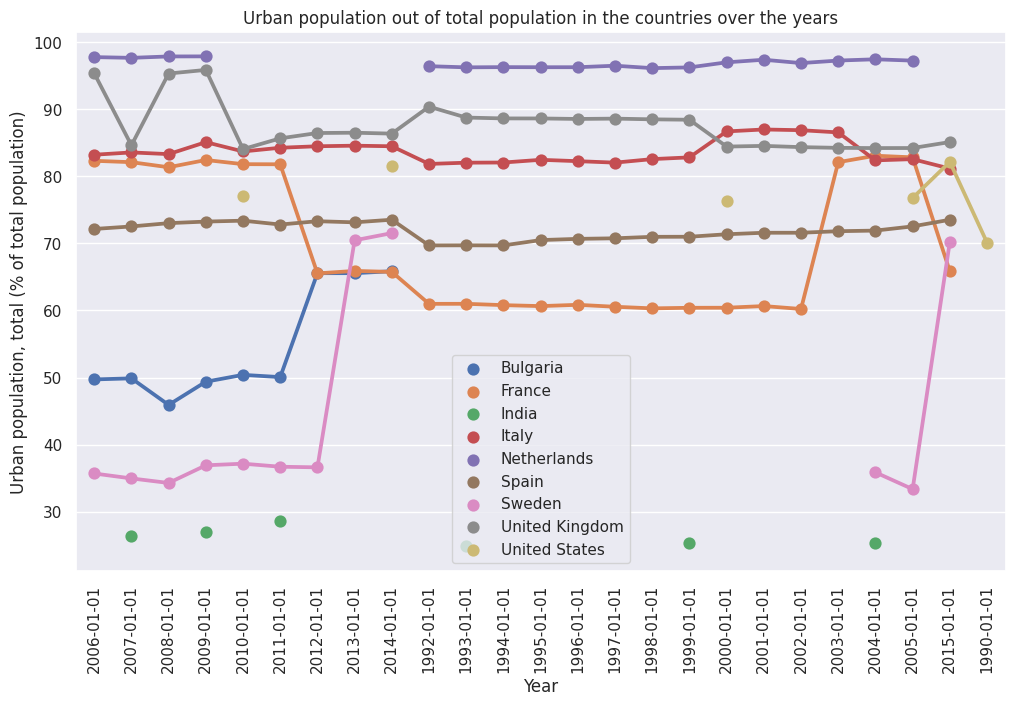

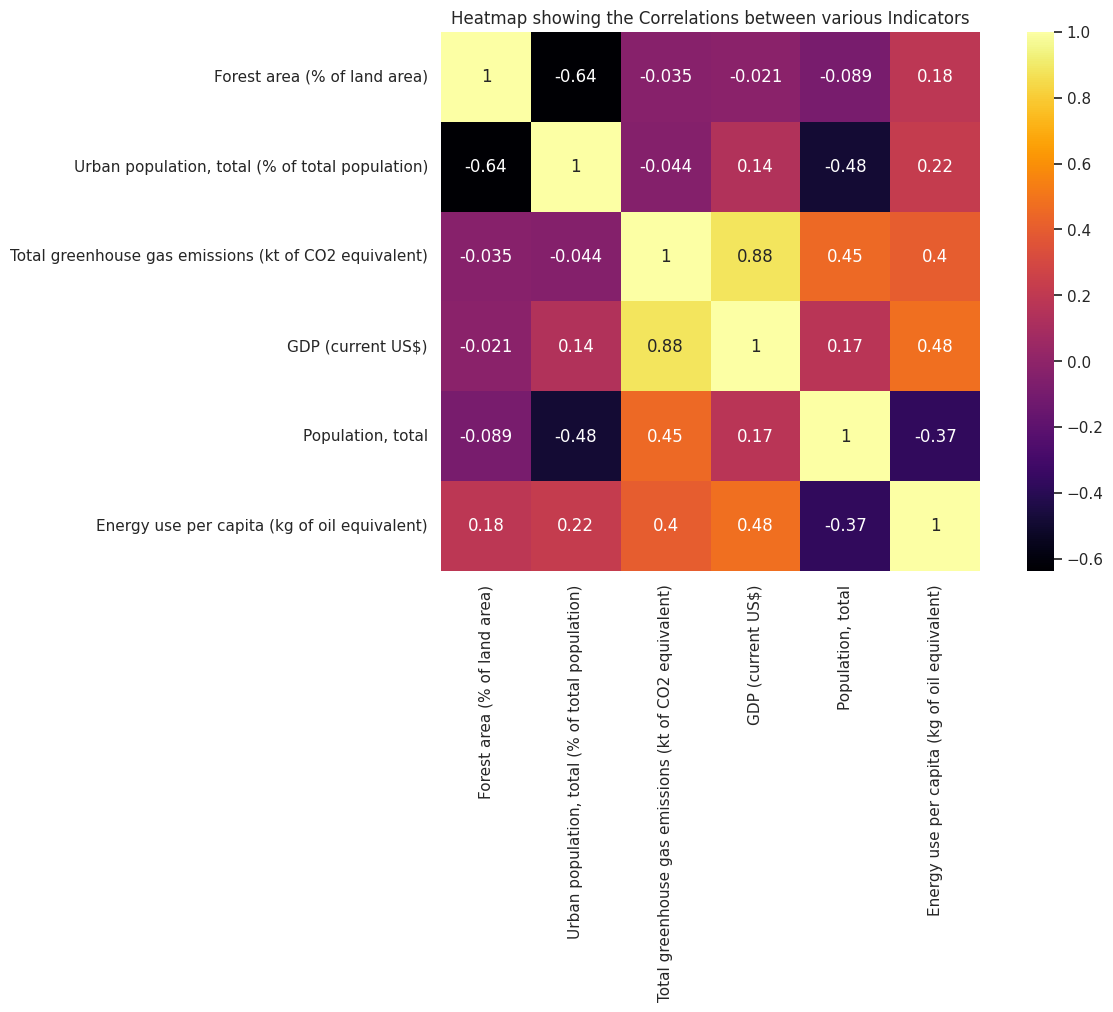

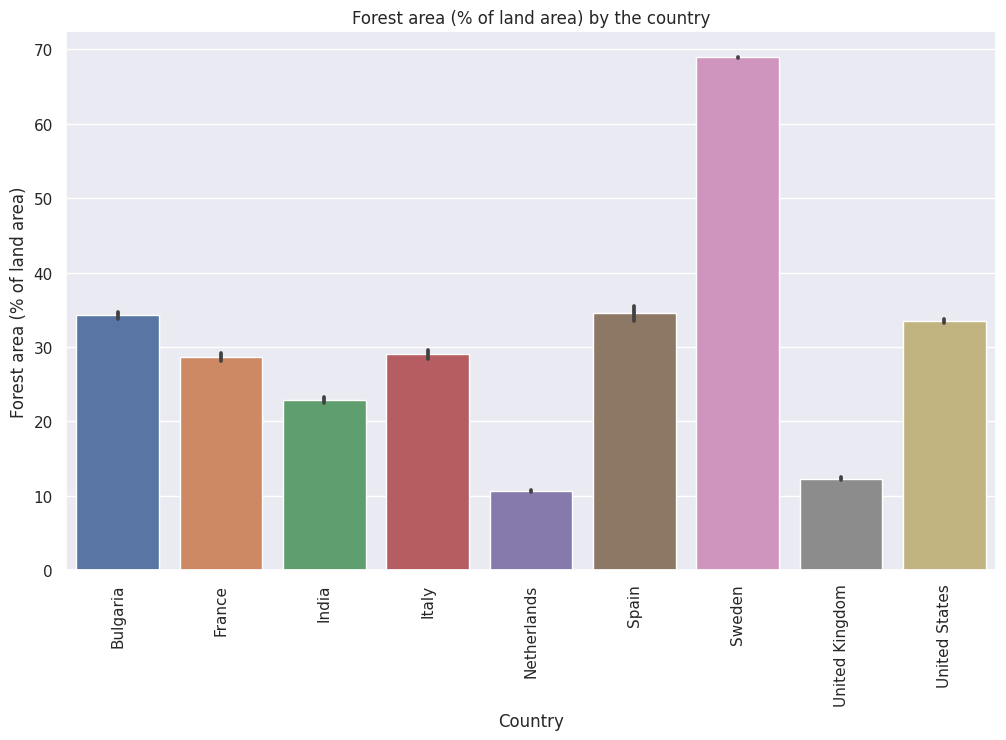

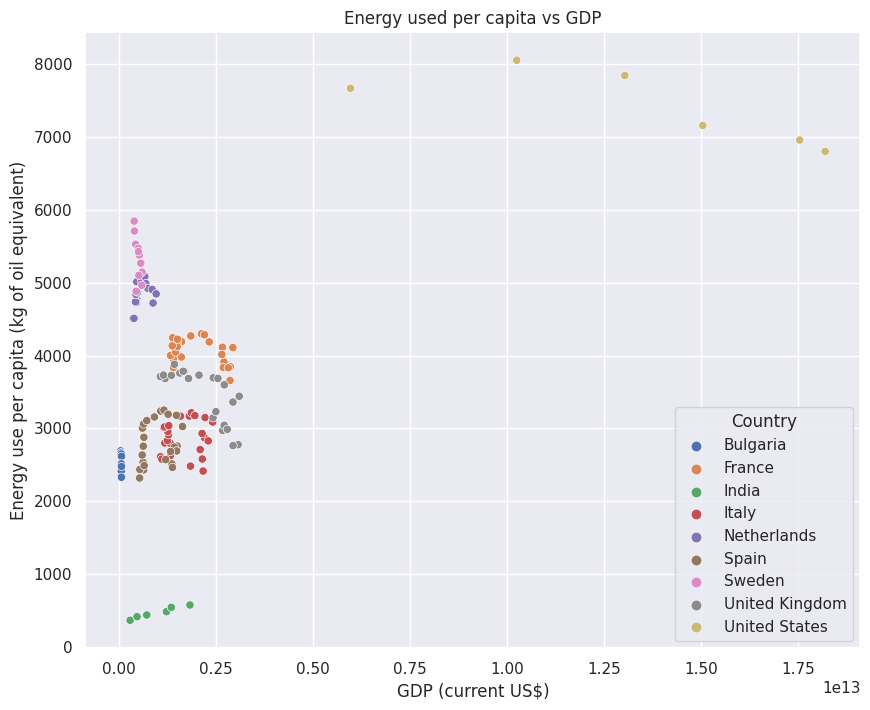

In [34]:
!pip install wbdata
import pandas as pd
import numpy as np
import wbdata
import matplotlib.pyplot as plt
import seaborn as sns
#read the csv file in the program

df1 = pd.read_csv('API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)
"""We clean the dataset and then transpose the values. Also .describe() is used to computes and displays summary statistics for a Python dataframe and .summary() is used to give the mean, std and IQR values"""
"""def clean_data(file):
    df1 = pd.read_csv(file, skiprows=4)
    df1 = df1.drop(columns=['Country Code', 'Indicator Code'])
    df1 = df1.set_index(['Country Name','Indicator Name'])
    df1 = df1.transpose()
    df1 = df1.dropna(how='all')
    return df1, df1.describe()
df1_transposed, df1_summary = clean_data('API_19_DS2_en_csv_v2_5361599.csv')
print(df1_transposed.head())
print(df1_summary)
"""
indi_codes = {'AG.LND.FRST.ZS':'Forest area (% of land area)',  'JI.POP.URBN.ZS':'Urban population, total (% of total population)',
    'EN.ATM.GHGT.KT.CE' : 'Total greenhouse gas emissions (kt of CO2 equivalent)',    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'SP.POP.TOTL': 'Population, total',
    'EG.USE.PCAP.KG.OE': 'Energy use per capita (kg of oil equivalent)'}#We define the indicator codes to access the data
data = wbdata.get_dataframe(indi_codes, country='all',convert_date=True) #The data is accessed
data = data.reset_index()#Cleaning the column
data = data.rename(columns={'country': 'Country', 'date': 'Year'})#The column is renamed
data.to_csv('data.csv', index=False)# Save the data as a csv file
df=pd.read_csv('/content/data.csv')
df.dropna(inplace=True)
df['Country'].unique()
df.columns
countries = ['Bulgaria', 'Spain','India', 'France', 'Italy','United States','United Kingdom','Netherlands', 'Sweden']#9 countries are chosen for analysis
df2 = df[df['Country'].isin(countries)]
indicators=['Year', 'Forest area (% of land area)',
       'Urban population, total (% of total population)',
         'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'GDP (current US$)',
       'Population, total',
       'Energy use per capita (kg of oil equivalent)']
df2.sort_values(by='Total greenhouse gas emissions (kt of CO2 equivalent)',ascending=False)# Sorting in terms of Total greenhouse gas emissions
"""We choose Spain first to check for total greenhouse gas emissions"""
sp_gg_em=df2[df2['Country']=='Spain']
sp_gg_em=sp_gg_em.iloc[::5]
# Create a line graph
plt.plot(sp_gg_em['Year'], sp_gg_em['Total greenhouse gas emissions (kt of CO2 equivalent)'])
# Set the title and labels
plt.title("Greenhouse gas emissions of Spain over time")
plt.xlabel("Year")
plt.ylabel("Greenhouse gas emissions (kt of CO2 equivalent)")
# Show the graph
plt.show()
print("\n\n")
# Calculate the total greenhouse gas emissions of Spain
sp_gg_em = sp_gg_em['Total greenhouse gas emissions (kt of CO2 equivalent)'].sum()
# Filter the data for the United States
ind_data = df[df['Country'] == 'India']
# Calculate the total greenhouse gas emissions of India
ind_gg_em = ind_data['Total greenhouse gas emissions (kt of CO2 equivalent)'].sum()
# Filter the data for the United Kingdom
uk_data = df[df['Country'] == 'United Kingdom']
# Calculate the total greenhouse gas emissions of the United Kingdom
uk_gg_em = uk_data['Total greenhouse gas emissions (kt of CO2 equivalent)'].sum()
# Create a bar graph
plt.bar(['Spain','India', 'United Kingdom'], [sp_gg_em, ind_gg_em, uk_gg_em],color='red')
# Set the title and labels
plt.title("Comparison of greenhouse gas emissions between Spain, India and the United Kingdom")
plt.xlabel("Countries")
plt.ylabel("Greenhouse gas emissions (kt of CO2 equivalent)")
plt.show()# Show the graph
#point plt
print("\n\n")
sns.set(rc={'figure.figsize':(12,7)})
plt.xticks(rotation=90)
ax=sns.pointplot(y="Urban population, total (% of total population)",x="Year",hue="Country",data=df2)
plt.title("Urban population out of total population in the countries over the years")
plt.legend()
plt.show()
print("\n\n")
# Creating a heatmap to visualize the correlation matrix of the indicators
corr_matrix = df2.corr("pearson")
sns.heatmap(corr_matrix, cmap='inferno', annot=True, square=True)#Create the hratmap
plt.title("Heatmap showing the Correlations between various Indicators")#Add the title
plt.show()#Display the heatmap
print("\n\n")
sns.barplot(data=df2.reset_index(), x=('Country'), y='Forest area (% of land area)')# A bar plot is created to visualize Forest area (% of land area) by the country
plt.xticks(rotation=90)#improving readability by rotating the x-axis labels
plt.title('Forest area (% of land area) by the country')# Add the title
plt.xlabel('Country')#Add the x label
plt.ylabel('Forest area (% of land area)')#Add the y label
plt.show()# Display the bar plot
print("\n\n")
plt.figure(figsize=(10,8))#Set the figure size
sns.scatterplot(data=df2, y='Energy use per capita (kg of oil equivalent)', x='GDP (current US$)', hue=df2['Country'])
plt.title('Energy used per capita vs GDP')# Adding a title 
plt.xlabel('GDP (current US$)')# Assign x label
plt.ylabel('Energy use per capita (kg of oil equivalent)')#Assign y label
plt.show()# Displaying the  scatter plot
